In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import time
import tqdm
import math

In [2]:
from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
from models.transformer import Transformer, iTransformer, PatchTST
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR

# 超参数
num_epochs = 10  # 训练的轮数
learning_rate = 0.001 # 学习率
num_samples = 10000  # 样本总数
input_len = 64  # 输入长度
output_len = 16  # 输出长度
input_channels = 13  # 输入通道数
output_channels = 13  # 输出通道数
batch_size = 64  # 批大小

# 实例化模型、损失函数、评估函数和优化器
MODEL = CNN(input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels)
loss_func = nn.MSELoss() # MSE，用于拟合
metric_func=nn.L1Loss() # MAE，用于评估
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
sum(p.numel() for p in MODEL.parameters())

115120

In [3]:
import mydatasets
import random
# 加载测试数据集（自己生成的模拟数据）
X, Y = mydatasets.load_test_data(id='2',
                                input_dim=(num_samples, input_len, input_channels),
                                output_dim=(num_samples, output_len, output_channels),
                                noise=0.2)
print('X shape:', X.shape)
print('Y shape:', Y.shape)
train_loader, val_loader, test_loader = mydatasets.get_XY_loaders(X, Y, batch_size=batch_size)

X shape: (10000, 64, 13)
Y shape: (10000, 16, 13)
Train dataset size: X: (7000, 64, 13); Y: (7000, 16, 13)
Val dataset size: X: (1000, 64, 13); Y: (1000, 16, 13)
Test dataset size: X: (2000, 64, 13); Y: (2000, 16, 13)


In [4]:
from my_utils import train, plot_fit_history

fit_history=train(MODEL, train_loader, val_loader, optimizer, num_epochs=num_epochs)

 10%|█         | 1/10 [00:00<00:06,  1.50it/s]

Epoch [ 1  /10], Time: 0.6680s, Loss: 0.0968, Metric: 0.2105, Val Loss: 0.0405, Val Metric: 0.1606


 20%|██        | 2/10 [00:01<00:04,  1.61it/s]

Epoch [ 2  /10], Time: 0.5867s, Loss: 0.0404, Metric: 0.1603, Val Loss: 0.0405, Val Metric: 0.1608


 30%|███       | 3/10 [00:01<00:04,  1.60it/s]

Epoch [ 3  /10], Time: 0.6301s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0406, Val Metric: 0.1608


 40%|████      | 4/10 [00:02<00:03,  1.63it/s]

Epoch [ 4  /10], Time: 0.5972s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0406, Val Metric: 0.1608


 50%|█████     | 5/10 [00:03<00:03,  1.63it/s]

Epoch [ 5  /10], Time: 0.6109s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0406, Val Metric: 0.1608


 60%|██████    | 6/10 [00:03<00:02,  1.63it/s]

Epoch [ 6  /10], Time: 0.6174s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0406, Val Metric: 0.1610


 70%|███████   | 7/10 [00:04<00:01,  1.60it/s]

Epoch [ 7  /10], Time: 0.6494s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0405, Val Metric: 0.1607


 80%|████████  | 8/10 [00:04<00:01,  1.60it/s]

Epoch [ 8  /10], Time: 0.6276s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0407, Val Metric: 0.1610


 90%|█████████ | 9/10 [00:05<00:00,  1.61it/s]

Epoch [ 9  /10], Time: 0.6076s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0405, Val Metric: 0.1608


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

Epoch [ 10 /10], Time: 0.6197s, Loss: 0.0404, Metric: 0.1604, Val Loss: 0.0407, Val Metric: 0.1611
Total Time: 6.2146s


In [7]:
print("Loss on test set: ", MODEL.evaluate(test_loader))

100%|██████████| 32/32 [00:00<00:00, 362.84it/s]

Loss on test set:  0.040621136456727984


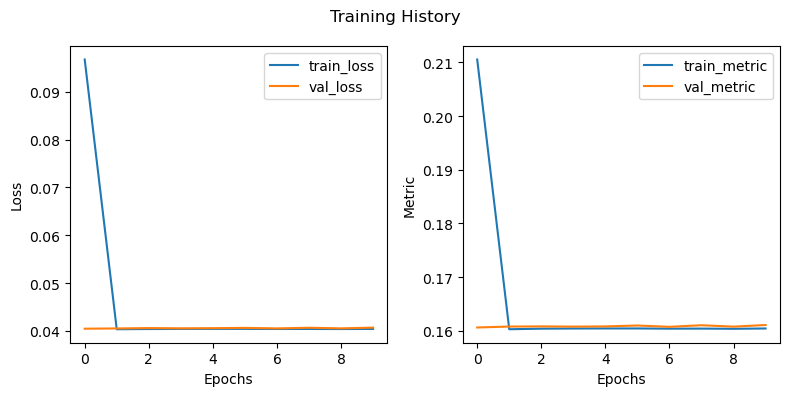

In [6]:
plot_fit_history(fit_history)